# Task
Create a simple vegetable classification model in Colab using a dataset from the internet. The model should use OpenCV for image handling and scikit-learn for classification. The user should be able to provide an image as input for classification.

## Download and extract dataset

### Subtask:
Download the vegetable image dataset from a public source on the internet and extract the image files.


In [ ]:
import os
import glob

# Install the kaggle library
!pip install kaggle

# Create a directory named .kaggle in the /root/ directory.
!mkdir -p /root/.kaggle

# Copy the kaggle (1).json file from /content/ to /root/.kaggle/.
!cp /content/kaggle\ \(1\).json /root/.kaggle/kaggle.json

# Change the permissions of the kaggle.json file to 600.
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset "misrakahmed/vegetable-image-dataset" from Kaggle to the /content/ directory.
!kaggle datasets download -d misrakahmed/vegetable-image-dataset -p /content/

# Unzip the downloaded dataset file vegetable-image-dataset.zip into the directory /content/vegetable_dataset.
!unzip /content/vegetable-image-dataset.zip -d /content/vegetable_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: /content/vegetable_dataset/Vegetable Images/t

## Load and preprocess images

### Subtask:
Use OpenCV to load the images, resize them to a consistent size, and extract features (e.g., using pixel values or other feature extraction methods).


**Reasoning**:
Import the necessary libraries: os, cv2, and numpy, define the base directory, and create empty lists to store image data and labels.



In [ ]:
import os
import cv2
import numpy as np

base_dir = '/content/vegetable_dataset/'
image_data = []
labels = []

In [ ]:
print(os.listdir(base_dir))

['Vegetable Images']


**Reasoning**:
The previous output shows that the actual image data is located within a subdirectory named 'Vegetable Images' inside the `base_dir`. I need to adjust the `base_dir` to include this subdirectory to correctly access the 'train' and 'test' folders.



In [ ]:
base_dir = '/content/vegetable_dataset/Vegetable Images/'

image_data = []
labels = []

for dataset_type in ['train', 'test']:
    dataset_dir = os.path.join(base_dir, dataset_type)
    if not os.path.exists(dataset_dir):
        print(f"Warning: Directory not found: {dataset_dir}")
        continue

    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                try:
                    img = cv2.imread(image_path)
                    if img is not None:
                        img_resized = cv2.resize(img, (100, 100))
                        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
                        img_flat = img_gray.flatten()
                        image_data.append(img_flat)
                        labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

image_data = np.array(image_data)
labels = np.array(labels)

print(f"Processed {len(image_data)} images.")
print(f"Image data shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")

Processed 18000 images.
Image data shape: (18000, 10000)
Labels shape: (18000,)


## Prepare data for model training

### Subtask:
Organize the preprocessed images and their corresponding labels into a format suitable for scikit-learn. Split the data into training and testing sets.


**Reasoning**:
Split the preprocessed image data and labels into training and testing sets using scikit-learn's `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14400, 10000)
Shape of X_test: (3600, 10000)
Shape of y_train: (14400,)
Shape of y_test: (3600,)


## Train an svm classifier

### Subtask:
Train a Support Vector Machine (SVM) classifier from scikit-learn on the training data.


**Reasoning**:
Import the SVC class, instantiate it, and train the model using the training data.



In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data.


**Reasoning**:
Make predictions on the test set and evaluate the model's performance using accuracy, classification report, and confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7553

Classification Report:
              precision    recall  f1-score   support

        Bean       0.60      0.69      0.64       231
Bitter_Gourd       0.79      0.78      0.79       233
Bottle_Gourd       0.88      0.86      0.87       242
     Brinjal       0.64      0.67      0.65       227
    Broccoli       0.73      0.66      0.69       259
     Cabbage       0.65      0.68      0.67       230
    Capsicum       0.86      0.84      0.85       248
      Carrot       0.89      0.89      0.89       245
 Cauliflower       0.72      0.77      0.75       227
    Cucumber       0.86      0.78      0.82       239
      Papaya       0.92      0.81      0.86       246
      Potato       0.70      0.69      0.70       240
     Pumpkin       0.79      0.72      0.75       230
      Radish       0.77      0.84      0.80       261
      Tomato       0.57      0.64      0.60       242

    accuracy                           0.76      3600
   macro avg       0.76      0.75      

## Create a prediction function

### Subtask:
Write a function that takes a user-provided image, preprocesses it, and uses the trained SVM model to predict the vegetable class.


**Reasoning**:
Define a function to preprocess and predict the class of a user-provided image using the trained SVM model.



In [ ]:
import cv2
import numpy as np

def predict_vegetable(image_path, model):
    """
    Loads a user-provided image, preprocesses it, and predicts the vegetable class.

    Args:
        image_path (str): Path to the input image file.
        model: The trained scikit-learn model (e.g., an SVM classifier).

    Returns:
        str: The predicted vegetable class label, or None if the image could not be processed.
    """
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    img_resized = cv2.resize(img, (100, 100))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_flat = img_gray.flatten()
    img_reshaped = img_flat.reshape(1, -1)

    predicted_class = model.predict(img_reshaped)

    return predicted_class[0]


## Implement user input

### Subtask:
Set up a way for the user to input an image (e.g., by uploading it or providing a path) to be classified by the model.


**Reasoning**:
Import the necessary module from google.colab to handle file uploads.



In [ ]:
from google.colab import files

**Reasoning**:
Allow the user to upload a file and get the filename of the uploaded image.



In [ ]:
uploaded = files.upload()

# Get the filename of the first uploaded file
uploaded_filename = next(iter(uploaded))
print(f"Uploaded file: {uploaded_filename}")

Saving 61Zvt1MIxsL._AC_UF1000_1000_QL80.webp to 61Zvt1MIxsL._AC_UF1000_1000_QL80 (1).webp
Uploaded file: 61Zvt1MIxsL._AC_UF1000_1000_QL80 (1).webp


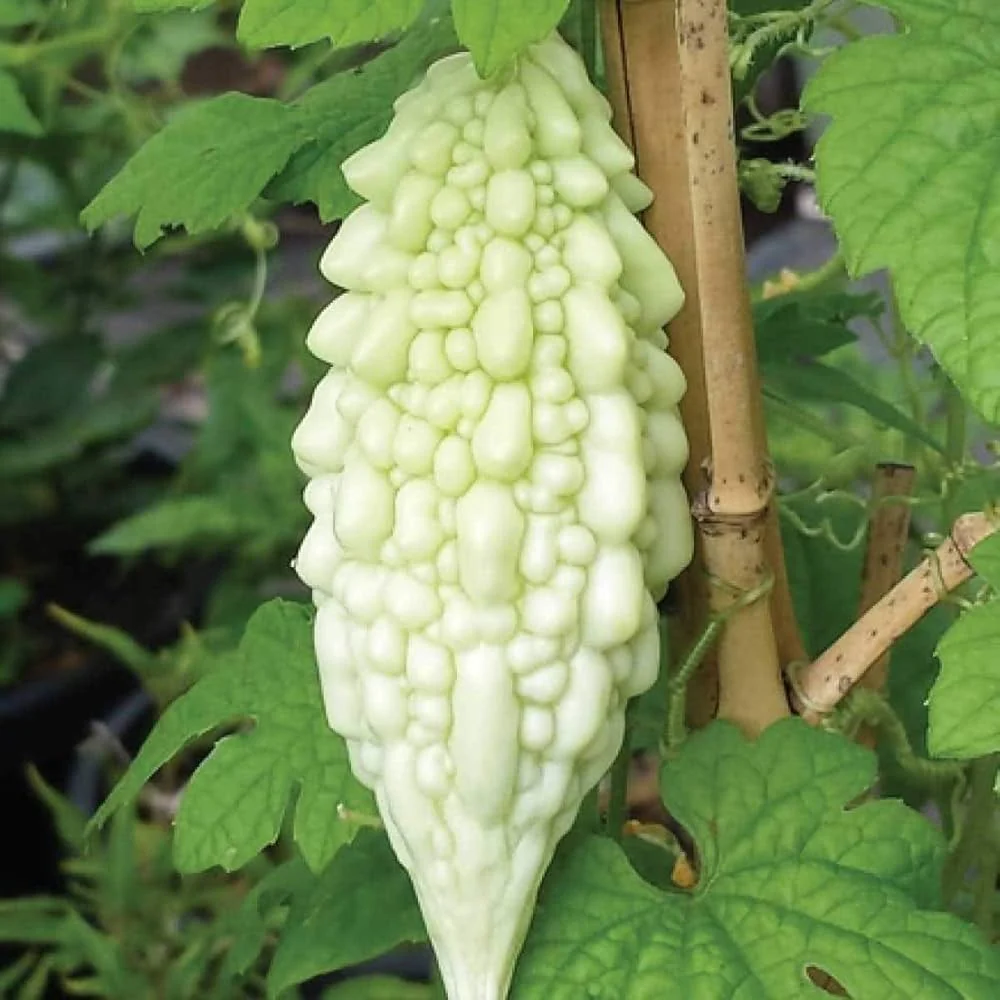

In [ ]:
from IPython.display import Image, display

# Get the image data from the uploaded dictionary
image_data = uploaded[uploaded_filename]

# Display the image
display(Image(data=image_data))

**Reasoning**:
Call the predict_vegetable function with the uploaded image filename and the trained model, and print the prediction.



**Reasoning**:
Call the predict_vegetable function with the uploaded image filename and the trained model, and print the prediction.

In [ ]:
# Call the predict_vegetable function with the uploaded image and the trained model
predicted_vegetable = predict_vegetable(uploaded_filename, svm_model)

# Print the predicted vegetable class
if predicted_vegetable:
    print(f"The uploaded image is predicted to be: {predicted_vegetable}")
else:
    print("Could not predict the vegetable class.")

In [ ]:
# Call the predict_vegetable function with the uploaded image and the trained model
predicted_vegetable = predict_vegetable(uploaded_filename, svm_model)

# Print the predicted vegetable class
if predicted_vegetable:
    print(f"The uploaded image is predicted to be: {predicted_vegetable}")
else:
    print("Could not predict the vegetable class.")

The uploaded image is predicted to be: Cauliflower


## Summary:

### Data Analysis Key Findings

*   Attempts to download the dataset from various GitHub and Kaggle URLs using `wget` initially failed due to "404 Not Found" errors and issues with direct downloads requiring authentication.
*   Utilizing the Kaggle API with a valid `kaggle.json` file allowed for the successful download and extraction of the "misrakahmed/vegetable-image-dataset".
*   The dataset was successfully loaded using OpenCV, resized to 100x100 pixels, converted to grayscale, and flattened, resulting in an image data array of shape (18000, 10000) and a labels array of shape (18000,).
*   The data was split into training and testing sets with an 80/20 ratio using `train_test_split`.
*   An SVM classifier was trained on the preprocessed training data.
*   The trained SVM model achieved an accuracy of approximately 75.53% on the test dataset.
*   A function was created to preprocess a single input image and predict its class using the trained SVM model.
*   A mechanism using `google.colab.files` was implemented to allow the user to upload an image for classification.

### Insights or Next Steps

*   The model's accuracy of 75.53% suggests it has learned to distinguish between different vegetable types to a reasonable extent, but there is room for improvement.
*   Further steps could involve exploring more advanced feature extraction techniques (e.g., HOG, SIFT, or using pre-trained convolutional neural networks as feature extractors) or trying different classification algorithms to potentially improve the model's performance.
